## Lab 04
** CSC 19900 - Introduction to Data Science**

** Friday, Dec. 1**

Marissa Bradley

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### SSE Function

Write a function called `SSE()`. This function is intended to calculate a "score" that indicates how well a given line fits the data. A low `SSE` score is better. 

The function `SSE` should take four parameters: `m`, `b`, `x`, and `y`. 

* `m` is the slope of the line currently being considered. 
* `b` is the intercept of the line currently being considered. 
* `x` is an array of `x` coordinates.
* `y` is an array of `y` coordinates.

The function should output the total of the sum of squared errors. 

In [2]:

def SSE(m,b,x,y):
    total = 0
    for i in range(0,len(x)):
        yVal = m * x[i] + b
        SEerror = y[i] - yVal
        SQerror = SEerror**2
        total += SQerror
    return total

To test your `SSE()` function, run the test code below. It should return the value 61. 

    print(SSE(2,7, [1,1], [3,4]))

In [3]:
print(SSE(2,7, [1,1], [3,4]))

61


### minSSE Function

Write a function called `minSSE()`. This function is intended to find the line with the best possible `SSE` score. It accomplishes this as follows:

* It starts with an initial "guess" that `m` and `b` are both 0. 
* It will consider four slight adjustments to the parameters for the line:
    * m + 0.01 and b
    * m - 0.01 and b
    * m and b + 0.01
    * m and b - 0.01
* It will calculate the `SSE` score for each of these four new sets of parameters. 
* If none of the new `SSE` scores are better than our current `SSE` score, then the function ends. 
* If one of the new values is lower than the current `SSE` score, then that new score will be stored, and `m` and `b` will be updated to new values. 

When the function is finished, it should return the values it found for `m` and `b`, rounded to 2 decimal places. 
    

In [8]:
def minSSE(x,y):
    m = 0
    b = 0
    curMin = SSE(m,b,x,y)
    done = False
    while done == False:
        curMin = SSE(m,b,x,y)
        s1 = SSE(m + 0.01,b,x,y)
        s2 = SSE(m - 0.01,b,x,y)
        s3 = SSE(m, b + 0.01,x,y)
        s4 = SSE(m , b - 0.01,x,y)
        if min(s1,s2,s3,s4) >= curMin:
            done = True
        else:
            curMin = min(s1,s2,s3,s4)
            if s1 == curMin:
                m += 0.01
            elif s2 == curMin:
                m += -0.01
            elif s3 == curMin:
                b += 0.01
            elif s4 == curMin:
                b += -0.01
                
    return round(m,2), round(b,2)

### Apply the minSSE Function

We will now use the `minSSE()` function to find the line that best fits a sample of points. 

The cell below reads the file `points.txt` into a data frame, and then stores the columns into arrays called `x` and `y`. The entries in these arrays refer to the coordinates of points.

In [9]:
df = pd.read_csv("points.csv")
x = df.loc[:,'x']
y = df.loc[:,'y']

The cell below creates a scatterplot of the points.

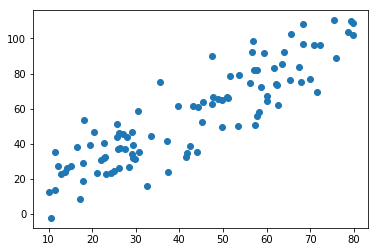

In [10]:
plt.scatter(x,y)
plt.show()

Called the minSSE() function on the arrays `x` and `y`. Store the results in variables calleed `slope` and `intercept`. Then print the following statements, with the bracketed expressions replaced with the appropriate values:

    The slope of the line of best fit is [slope].
    The intercept of the line of best fit is [intercept].

In [11]:
slope,intercept = minSSE(x,y)
print("The slope of the line of best fit is " + str(slope) + ".")
print("The intercept of the line of best fit is " + str(intercept) + ".")

The slope of the line of best fit is 1.23.
The intercept of the line of best fit is 3.47.


The cell below creates a new scatter plot, with the line of best fit displayed. 

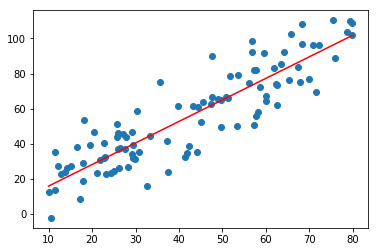

In [12]:
y0 = slope * 10 + intercept
y1 = slope * 80 + intercept
plt.scatter(x,y)
plt.plot([10,80],[y0,y1], c='red')
plt.show()